# Carvana Image Masking Challenge

https://www.kaggle.com/c/carvana-image-masking-challenge

In [2]:
IMG_ROWS = 480
IMG_COLS = 320

TEST_IMG_ROWS = 1918
TEST_IMG_COLS = 1280

In [3]:
import cv2
import numpy as np
from scipy import ndimage
from glob import glob

SAMPLE = 5000

train_img_paths = sorted(glob('./data/train/*.jpg'))[:SAMPLE]
train_mask_paths = sorted(glob('./data/train_masks/*.gif'))[:SAMPLE]

train_imgs = np.array([cv2.resize(ndimage.imread(path), (IMG_ROWS, IMG_COLS))
                        for path in train_img_paths])

train_masks = np.array([cv2.resize(ndimage.imread(path, mode = 'L'), (IMG_ROWS, IMG_COLS))
                        for path in train_mask_paths])

train_masks = train_masks.astype(np.float32)
train_masks[train_masks<=127] = 0.
train_masks[train_masks>127] = 1.
train_masks = np.reshape(train_masks, (*train_masks.shape, 1))

IndexError: index 0 is out of bounds for axis 0 with size 0

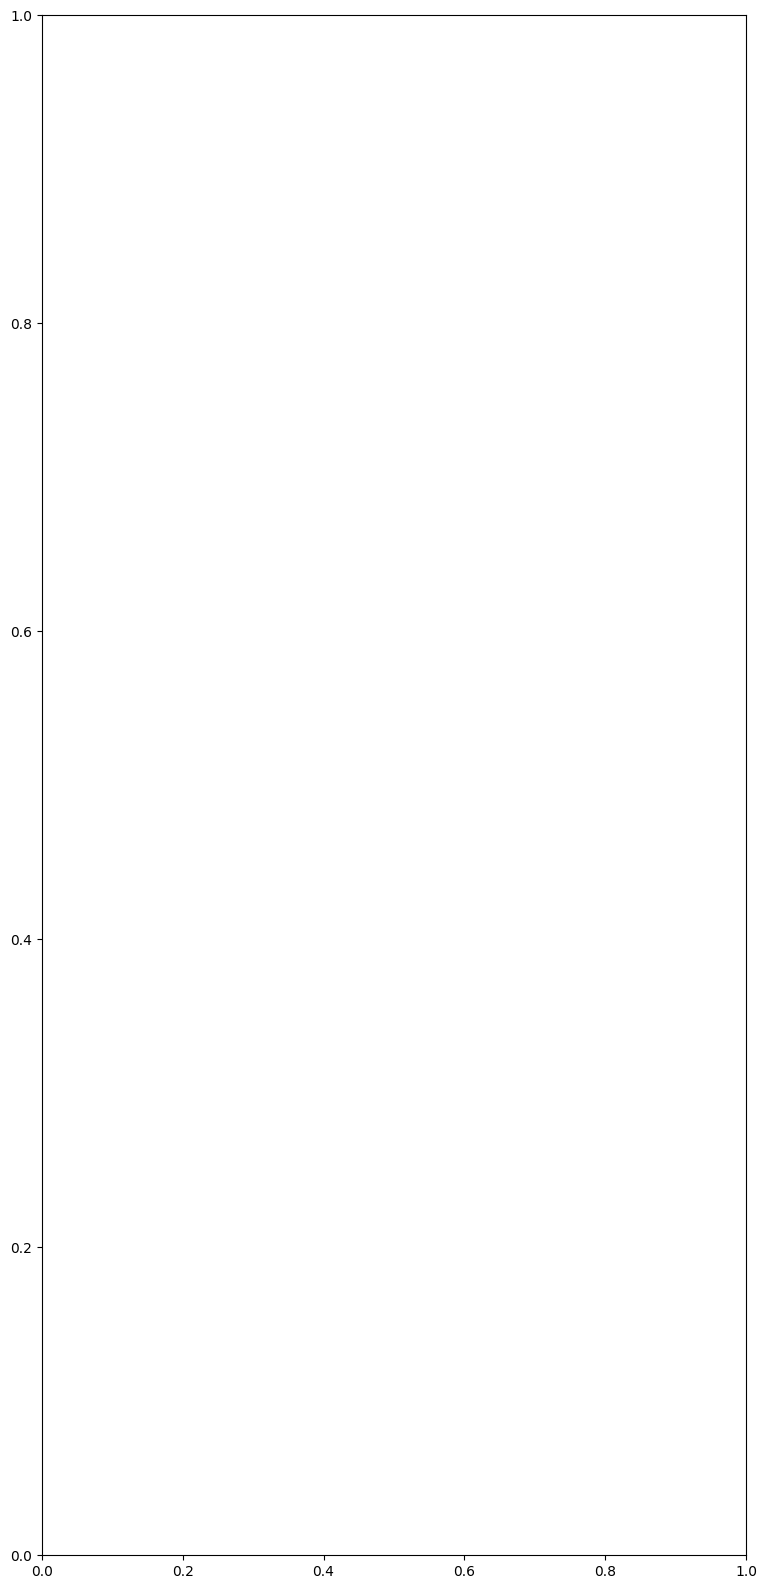

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(0, figsize=(20, 20))
fig.add_subplot(1, 2, 1)
plt.imshow(train_imgs[0])
fig.add_subplot(1, 2, 2)
plt.imshow(np.squeeze(train_masks[0]), cmap='gray')

## Инициализируем архитектуру U-Net

In [5]:
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Conv2DTranspose
from keras.layers import BatchNormalization
from keras.layers import concatenate
from keras.models import Model

inputs = Input((IMG_COLS, IMG_ROWS, 3))
bnorm1 = BatchNormalization()(inputs)
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(bnorm1)
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

model = Model(inputs=[inputs], outputs=[conv10])

ModuleNotFoundError: No module named 'tensorflow'